## How much tracer is there on the shelf?

This notebook explores the effects of changing the vertical diffusivity (constant, 3D), changing the isopycnal diffusivity in GMREDI and having a canyon vs a flat shelf on the total amount of tracer (mass) on the shelf at a certain time and place.

In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')

In [4]:
#Grid to use for all calculations 
NoCGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
NoCGridOut = Dataset(NoCGrid)

#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

#Varying-K_iso runs CNTDIFF:
CNTrun02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/stateGlob.nc'
StateOut02 = Dataset(CNTrun02)
CNTrun02Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/ptracersGlob.nc'
CNTrun03Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
CNTrun04Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/ptracersGlob.nc'
CNTrun07Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'

#Varying-K_v 3D runs
DIFF3Drun04Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
DIFF3Drun05Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
DIFF3Drun06Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
DIFF3Drun07Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'

#No GMREDI runs
NORrun02Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/ptracersGlob.nc'
NORrun03Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/ptracersGlob.nc'
NORrun04Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/ptracersGlob.nc' # No canyon case
NORrun05Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/ptracersGlob.nc' # Closed Bdies
NORrun06Tr = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/ptracersGlob.nc' # Closed Bdies, no canyon



In [5]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

rc = NoCGridOut.variables['RC']
xc = rout.getField(NoCGrid, 'XC') # x coords tracer cells
yc = rout.getField(NoCGrid, 'YC') # y coords tracer cells

drF = NoCGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(NoCGrid,'dxG')

Mask = rout.getMask(NoCGrid,'HFacC') 
hFacC = rout.getField(NoCGrid,'HFacC') 
rA = rout.getField(NoCGrid,'rA') 
drF= NoCGridOut.variables['drF']

MaskCan = rout.getMask(CGrid,'HFacC') 
hFacCCan = rout.getField(CGrid,'HFacC') 
rACan = rout.getField(CGrid,'rA') 
drFCan= CGridOut.variables['drF']


In [6]:
# Load tracers variable K_iso
CNT02Tr1 = rout.getField(CNTrun02Tr,'Tr1') # Tracer 1 CNT run02 , Kz = E-5
CNT02Tr3 = rout.getField(CNTrun02Tr,'Tr3') # Tracer 3 CNT run02 , Kz = E-3
CNT03Tr1 = rout.getField(CNTrun03Tr,'Tr1') # Tracer 1 CNT run03 , Kz = E-5
CNT03Tr2 = rout.getField(CNTrun03Tr,'Tr2') # Tracer 1 CNT run03 , Kz = E-5
CNT03Tr3 = rout.getField(CNTrun03Tr,'Tr3') # Tracer 3 CNT run03 , Kz = E-3
CNT04Tr1 = rout.getField(CNTrun04Tr,'Tr1') # Tracer 1 CNT run04 , Kz = E-5
CNT04Tr3 = rout.getField(CNTrun04Tr,'Tr3') # Tracer 3 CNT run04 , Kz = E-3
CNT07Tr1 = rout.getField(CNTrun07Tr,'Tr1') # Tracer 1 CNT run04 , Kz = E-5
CNT07Tr3 = rout.getField(CNTrun07Tr,'Tr3') # Tracer 3 CNT run04 , Kz = E-3


In [7]:
# Load tracers variable K_v
DIFF3D04Tr1 = rout.getField(DIFF3Drun04Tr,'Tr1') # Tracer 1 3D run01 , Kz = E-7 out, E-3 in
DIFF3D05Tr1 = rout.getField(DIFF3Drun05Tr,'Tr1') # Tracer 1 3D run02 , Kz = E-7 out, E-4 in
DIFF3D06Tr1 = rout.getField(DIFF3Drun06Tr,'Tr1') # Tracer 1 3D run06 , Kz = E-5 out, E-4 in
DIFF3D07Tr1 = rout.getField(DIFF3Drun07Tr,'Tr1') # Tracer 1 3D run03 , Kz = E-5 out, E-4 in


In [8]:
# Load tracers of no REDI run
NOR02Tr1 = rout.getField(NORrun02Tr,'Tr1') # Tracer 1 NoREDI run02 , Kz = E-5
NOR02Tr3 = rout.getField(NORrun02Tr,'Tr3') # Tracer 3 NoREDI run02 , Kz = E-3 
NOR03Tr1 = rout.getField(NORrun03Tr,'Tr1') # Tracer 1 NoREDI run03 , Kz = E-5
NOR03Tr3 = rout.getField(NORrun03Tr,'Tr3') # Tracer 3 NoREDI run03 , Kz = E-3 
NOR04Tr1 = rout.getField(NORrun04Tr,'Tr1') # Tracer 1 NoC NoR run04 No Redi , Kz = E-5
NOR04Tr3 = rout.getField(NORrun04Tr,'Tr3') # Tracer 3 NoC NoR run04 No redi , Kz = E-3 
NOR05Tr1 = rout.getField(NORrun05Tr,'Tr1') # Tracer 1 NoREDI run05 Closed Bdies
NOR05Tr3 = rout.getField(NORrun05Tr,'Tr3') # Tracer 3 NoREDI run05 Closed Bdies
NOR06Tr1 = rout.getField(NORrun06Tr,'Tr1') # Tracer 1 NoREDI run06 Closed Bdies, no canyon
NOR06Tr3 = rout.getField(NORrun06Tr,'Tr3') # Tracer 3 NoREDI run06 Closed Bdies, no canyon


### How much water with concentration higher than a limit is there on the shelf at each time? How much tracer mass?

In [23]:
def HowMuchWaterX(Tr,MaskC,nzlim,rA,hFacC,drF,yin,zfin):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : across-shore index of shelf break
    zfin  : shelf break index + 1 
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [:,:30,227:,:] at every time output.
    Total_Tracer =  Array with the mass of tracer (Mol) at each x-position over the shelf [:,:30,227:,:] at every time output.
          Total mass of tracer at xx on the shelf.
                                                
    -----------------------------------------------------------------------------------------------------------------------
    '''
    mask_expand = np.expand_dims(MaskC,0)
    mask_expand = mask_expand + np.zeros(Tr.shape)

    TrMask0=np.ma.array(Tr[0,:,:,:],mask=mask_expand[0,:,:,:])
        
    trlim = TrMask0[nzlim,50,180]
    
    hFacCSwap = np.swapaxes(hFacC, 0, 2)
    
    print('tracer limit is: ',trlim)
    
    TrMask=np.ma.array(Tr,mask=mask_expand)
    
    WaterX = 0
    
    # Make mask for cells with tracer concentration >= trlim on shelf
    HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:,:], trlim) 
    HighConc_Mask = HighConc_Masked.mask
    
    #Get volume of water of cells with relatively high concentration
    rA_exp = np.expand_dims(rA[yin:,:],0)
    drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
    rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    
    ShelfVolume = hFacC[:zfin,yin:,:]*drF_exp*rA_exp
    ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
    ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
    HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
    VolWaterHighConc = np.ma.sum(np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1),axis=1)
    
    
    
    #Get total mass of tracer on shelf
    Total_Tracer = np.ma.sum(np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:,:]*1000.0,axis = 1),axis=1),axis=1) # 1 m^3 = 1000 l
    
    return (VolWaterHighConc, Total_Tracer)

### Calculate volume on shelf of high tracer concentration water and tracer mass. 

In [24]:


(WatCNT02Tr1, TrMassCNT02Tr1) = HowMuchWaterX(CNT02Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT02Tr3, TrMassCNT02Tr3) = HowMuchWaterX(CNT02Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT03Tr1, TrMassCNT03Tr1) = HowMuchWaterX(CNT03Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT03Tr2, TrMassCNT03Tr2) = HowMuchWaterX(CNT03Tr2,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT03Tr3, TrMassCNT03Tr3) = HowMuchWaterX(CNT03Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT04Tr1, TrMassCNT04Tr1) = HowMuchWaterX(CNT04Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT04Tr3, TrMassCNT04Tr3) = HowMuchWaterX(CNT04Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(WatCNT07Tr1, TrMassCNT07Tr1) = HowMuchWaterX(CNT07Tr1,Mask,30,rA,hFacC,drF,227,30) 
(WatCNT07Tr3, TrMassCNT07Tr3) = HowMuchWaterX(CNT07Tr3,Mask,30,rA,hFacC,drF,227,30) 
        
    
   

('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)


In [40]:

( WatNOR02Tr1, TrMassNOR02Tr1) = HowMuchWaterX(NOR02Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
( WatNOR02Tr3, TrMassNOR02Tr3) = HowMuchWaterX(NOR02Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
( WatNOR03Tr1, TrMassNOR03Tr1) = HowMuchWaterX(NOR03Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
( WatNOR03Tr3, TrMassNOR03Tr3) = HowMuchWaterX(NOR03Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 

( WatNOR04Tr1, TrMassNOR04Tr1) = HowMuchWaterX(NOR04Tr1,Mask,30,rA,hFacC,drF,227,30) 
( WatNOR04Tr3, TrMassNOR04Tr3) = HowMuchWaterX(NOR04Tr3,Mask,30,rA,hFacC,drF,227,30) 
( WatNOR05Tr1, TrMassNOR05Tr1) = HowMuchWaterX(NOR05Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
( WatNOR05Tr3, TrMassNOR05Tr3) = HowMuchWaterX(NOR05Tr3,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
( WatNOR06Tr1, TrMassNOR06Tr1) = HowMuchWaterX(NOR06Tr1,Mask,30,rA,hFacC,drF,227,30) 
( WatNOR06Tr3, TrMassNOR06Tr3) = HowMuchWaterX(NOR06Tr3,Mask,30,rA,hFacC,drF,227,30) 
       
   

('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)


In [26]:

(Wat3D04Tr1, TrMass3D04Tr1) = HowMuchWaterX(DIFF3D04Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(Wat3D06Tr1, TrMass3D06Tr1) = HowMuchWaterX(DIFF3D06Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(Wat3D07Tr1, TrMass3D07Tr1) = HowMuchWaterX(DIFF3D07Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30) 
(Wat3D05Tr1, TrMass3D05Tr1) = HowMuchWaterX(DIFF3D05Tr1,MaskCan,30,rACan,hFacCCan,drFCan,227,30)       
   
    

('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)
('tracer limit is: ', 7.3974895)


### Case 1: Changing $K_{iso}$ in GMREDI

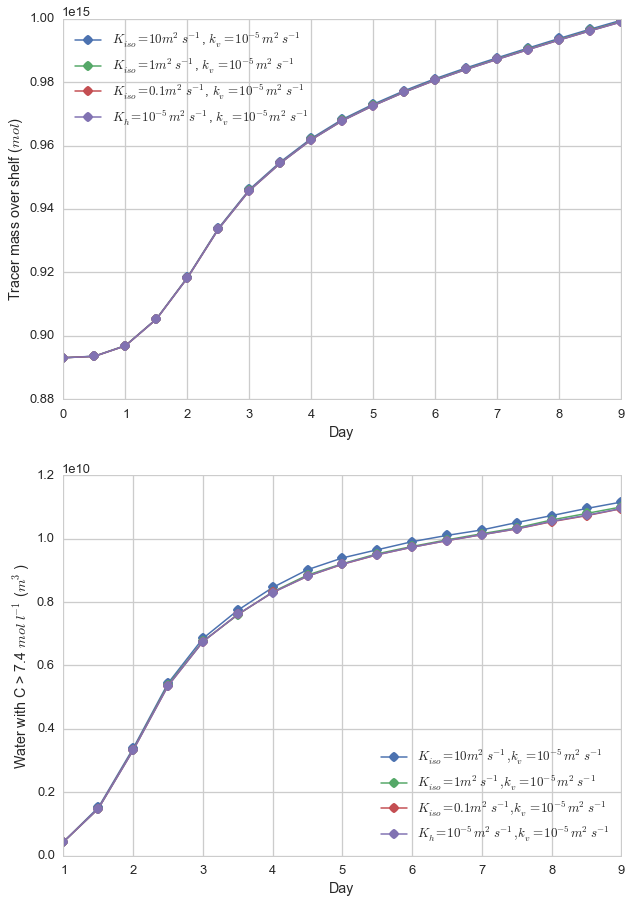

In [34]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassCNT02Tr1,'o-',label='$K_{iso}=10m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassCNT03Tr1,'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassCNT04Tr1,'o-', label='$K_{iso}=0.1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TrMassNOR02Tr1,'o-', label='$K_{h}=10^{-5}m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatCNT02Tr1-0.0,'o-',label='$K_{iso}=10m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatCNT03Tr1-0.0,'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatCNT04Tr1-0.0,'o-', label='$K_{iso}=0.1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, WatNOR02Tr1-0.0,'o-', label='$K_{h}=10^{-5}m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        


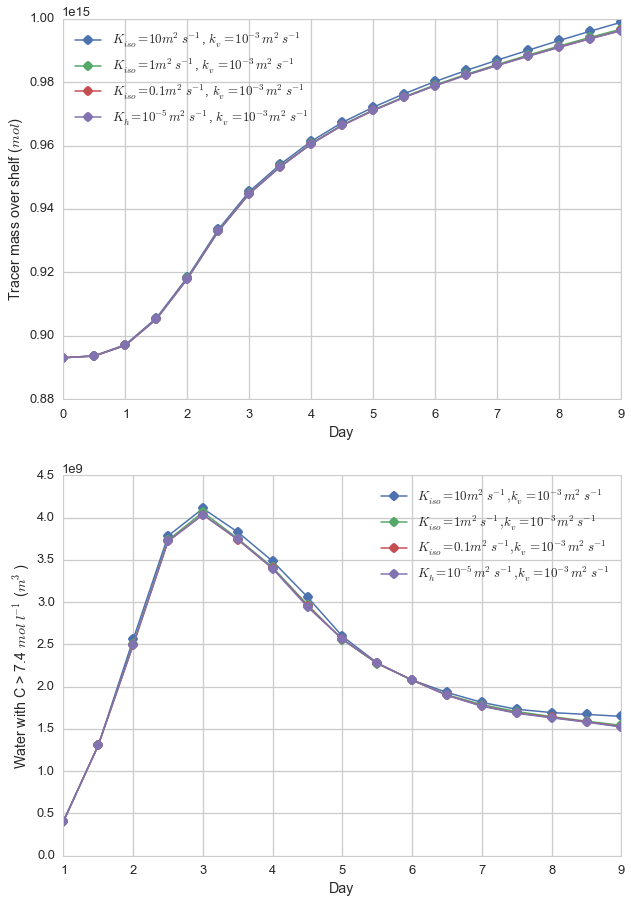

In [35]:


fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassCNT02Tr3,'o-',label='$K_{iso}=10m^2s^{-1}$, $k_v=10^{-3}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassCNT03Tr3,'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-3}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassCNT04Tr3,'o-', label='$K_{iso}=0.1m^2s^{-1}$, $k_v=10^{-3}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TrMassNOR02Tr3,'o-', label='$K_{h}=10^{-5}m^2s^{-1}$, $k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatCNT02Tr3,'o-',label='$K_{iso}=10m^2s^{-1}, k_v=10^{-3}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatCNT03Tr3,'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-3}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatCNT04Tr3,'o-', label='$K_{iso}=0.1m^2s^{-1}, k_v=10^{-3}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, WatNOR02Tr3,'o-', label='$K_{h}=10^{-5}m^2s^{-1}, k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr3.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        


### Effect of Changing 3D Diff

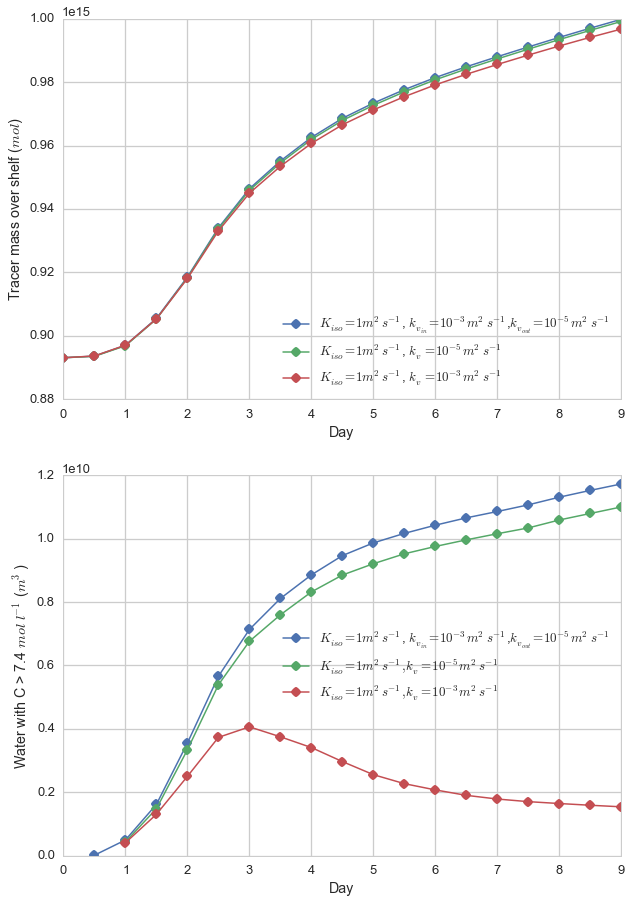

In [36]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMass3D06Tr1,'o-',label='$K_{iso}=1m^2s^{-1}$, $k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassCNT03Tr1,'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassCNT03Tr3,'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, Wat3D06Tr1,'o-',label='$K_{iso}=1m^2s^{-1}$, $k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatCNT03Tr1,'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatCNT03Tr3,'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelf3DDiffEffect1.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        


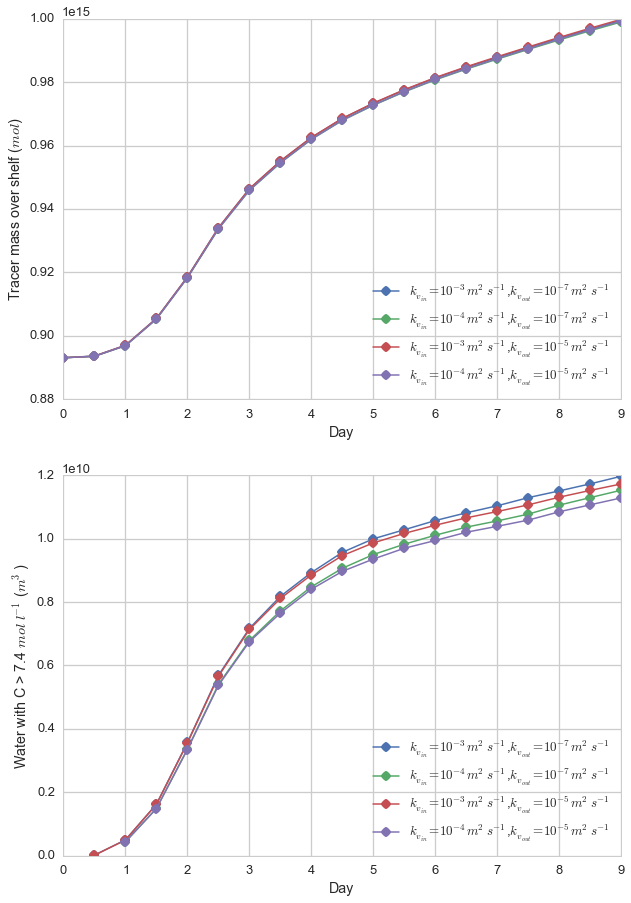

In [37]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)
times2 = np.arange(0,16,1)

ax1 = plt.subplot(2,1,1)


line1 = ax1.plot(times/2.0, TrMass3D04Tr1,'o-',label='$k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-7}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMass3D05Tr1,'o-', label='$k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-7}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMass3D06Tr1,'o-', label='$k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TrMass3D07Tr1,'o-', label='$k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, Wat3D04Tr1,'o-',label='$k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-7}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, Wat3D05Tr1,'o-', label='$k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-7}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, Wat3D06Tr1,'o-', label='$k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, Wat3D07Tr1,'o-', label='$k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelf3DDiffEffect2.eps', format='eps', dpi=1000, bbox_inches='tight')



### Effect of horizontal diffusivity in NOREDI

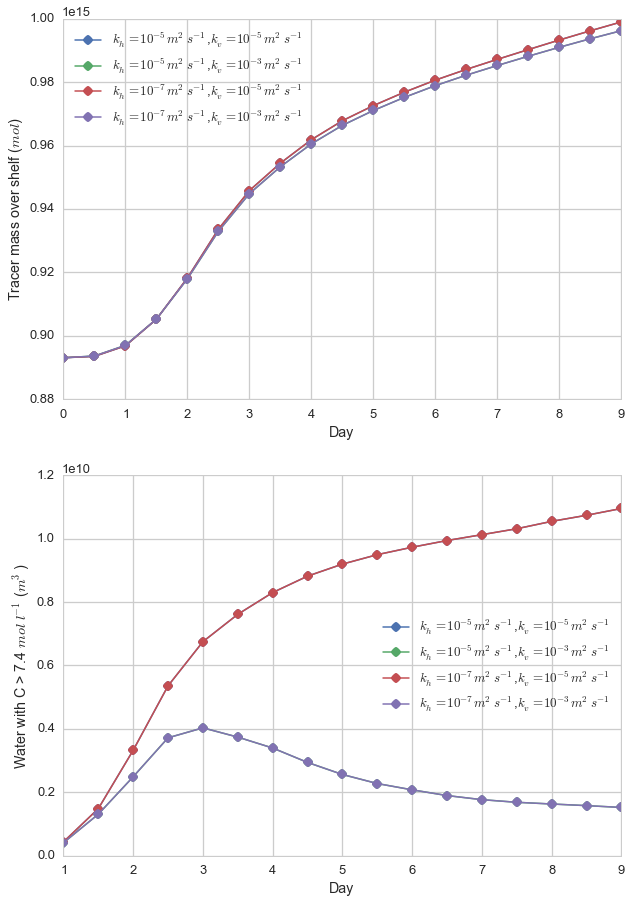

In [41]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR02Tr1,'o-',label='$k_h=10^{-5}m^2s^{-1}$,$k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassNOR02Tr3,'o-', label='$k_h=10^{-5}m^2s^{-1}$,$k_v=10^{-3}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassNOR03Tr1,'o-', label='$k_h=10^{-7}m^2s^{-1}$,$k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassNOR03Tr3,'o-', label='$k_h=10^{-7}m^2s^{-1}$,$k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR02Tr1,'o-',label='$k_h=10^{-5}m^2s^{-1}$,$k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatNOR02Tr3,'o-', label='$k_h=10^{-5}m^2s^{-1}$,$k_v=10^{-3}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatNOR03Tr1,'o-', label='$k_h=10^{-7}m^2s^{-1}$,$k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatNOR03Tr3,'o-', label='$k_h=10^{-7}m^2s^{-1}$,$k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNOREDIHorDiffEffect.eps', format='eps', dpi=1000, bbox_inches='tight')



### Canyon Effects
#### A) Numerical 

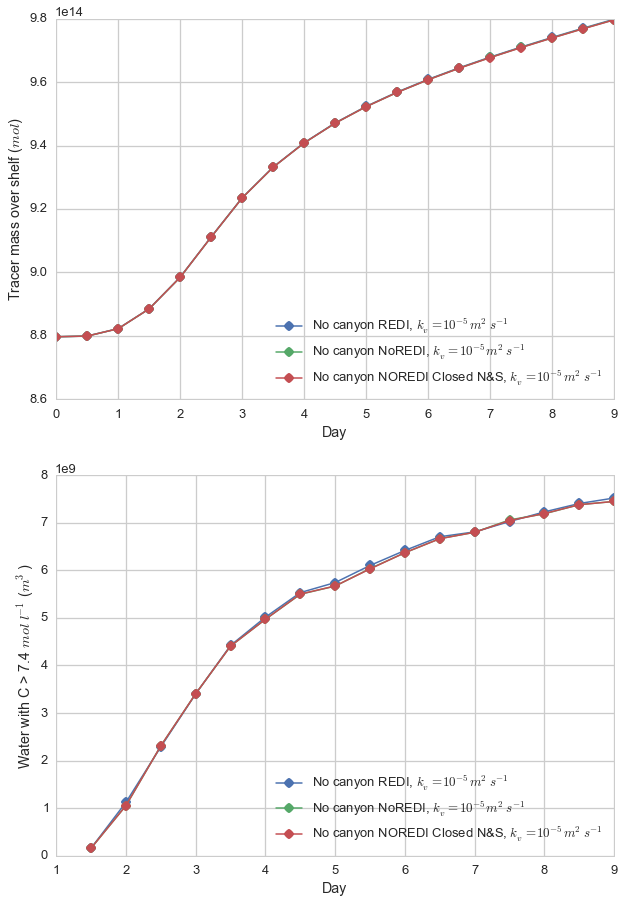

In [42]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassCNT07Tr1,'o-',label='No canyon REDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassNOR04Tr1,'o-', label='No canyon NoREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassNOR06Tr1,'o-', label='No canyon NOREDI Closed N&S, $k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatCNT07Tr1,'o-',label='No canyon REDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatNOR04Tr1,'o-', label='No canyon NoREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatNOR06Tr1,'o-', label='No canyon NOREDI Closed N&S, $k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNoCanyonCasesTr1.eps', format='eps', dpi=1000, bbox_inches='tight')



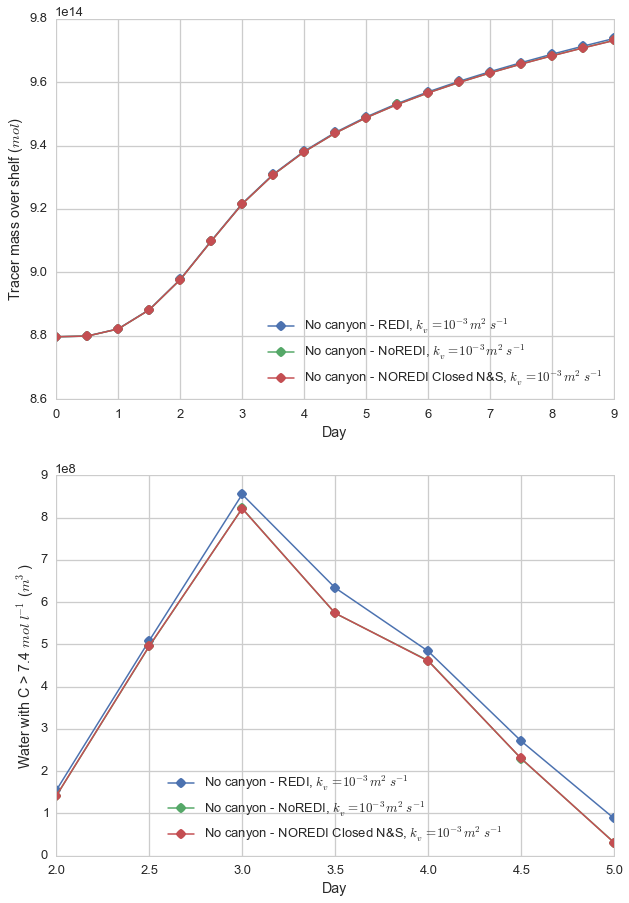

In [43]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassCNT07Tr3,'o-',label='No canyon - REDI, $k_v=10^{-3}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassNOR04Tr3,'o-', label='No canyon - NoREDI, $k_v=10^{-3}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMassNOR06Tr3,'o-', label='No canyon - NOREDI Closed N&S, $k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatCNT07Tr3,'o-',label='No canyon - REDI, $k_v=10^{-3}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatNOR04Tr3,'o-', label='No canyon - NoREDI, $k_v=10^{-3}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatNOR06Tr3,'o-', label='No canyon - NOREDI Closed N&S, $k_v=10^{-3}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNoCanyonCasesTr3.eps', format='eps', dpi=1000, bbox_inches='tight')



#### B) Effects of enhanced vertical diffusivity within the canyon

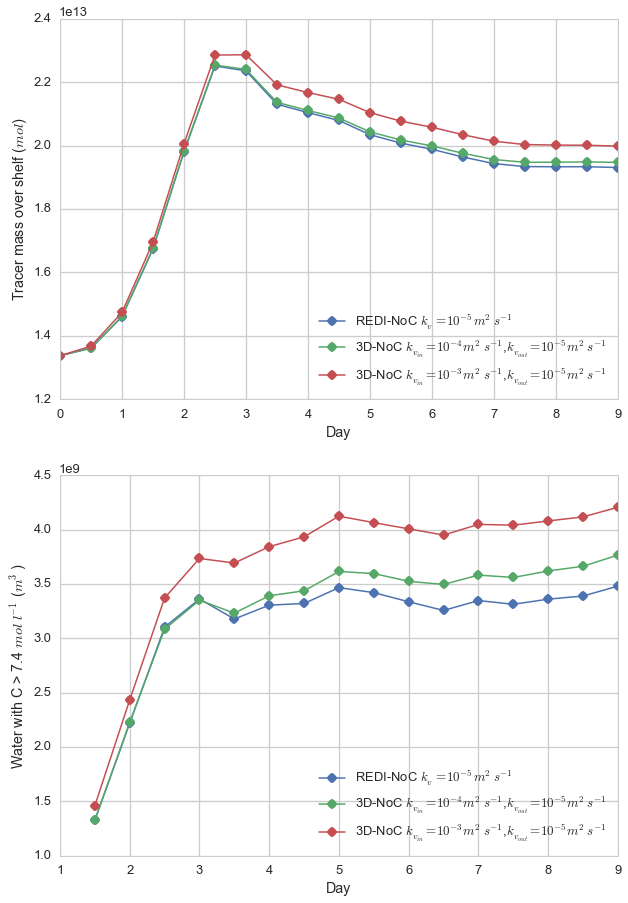

In [44]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassCNT03Tr1-TrMassCNT07Tr1,'o-',label='REDI-NoC $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMass3D07Tr1-TrMassCNT07Tr1,'o-', label='3D-NoC $k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TrMass3D06Tr1-TrMassCNT07Tr1,'o-', label='3D-NoC $k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatCNT03Tr1-WatCNT07Tr1,'o-',label='REDI-NoC $k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, Wat3D07Tr1-WatCNT07Tr1,'o-', label='3D-NoC $k_{v_{in}}=10^{-4}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, Wat3D06Tr1-WatCNT07Tr1,'o-', label='3D-NoC $k_{v_{in}}=10^{-3}m^2s^{-1}$,$k_{v_{out}}=10^{-5}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNoCanyonEnhancedDiff.eps', format='eps', dpi=1000, bbox_inches='tight')


#### C) Boundary effects

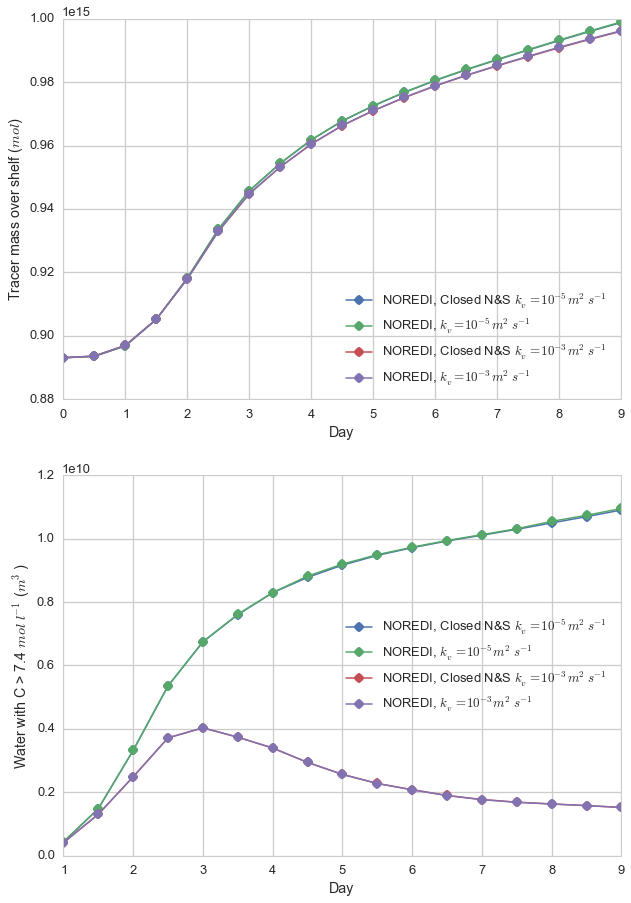

In [45]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR05Tr1,'o-',label='NOREDI, Closed N&S $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR02Tr1,'o-', label='NOREDI, $k_{v}=10^{-5}m^2s^{-1}$')
line1 = ax1.plot(times/2.0, TrMassNOR05Tr3,'o-',label='NOREDI, Closed N&S $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR02Tr3,'o-', label='NOREDI, $k_{v}=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR05Tr1,'o-',label='NOREDI, Closed N&S $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR02Tr1,'o-', label='NOREDI, $k_v=10^{-5}m^2s^{-1}$ ')
line1 = ax2.plot(times/2.0, WatNOR05Tr3,'o-',label='NOREDI, Closed N&S $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR02Tr3,'o-', label='NOREDI, $k_v=10^{-3}m^2s^{-1}$ ')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)



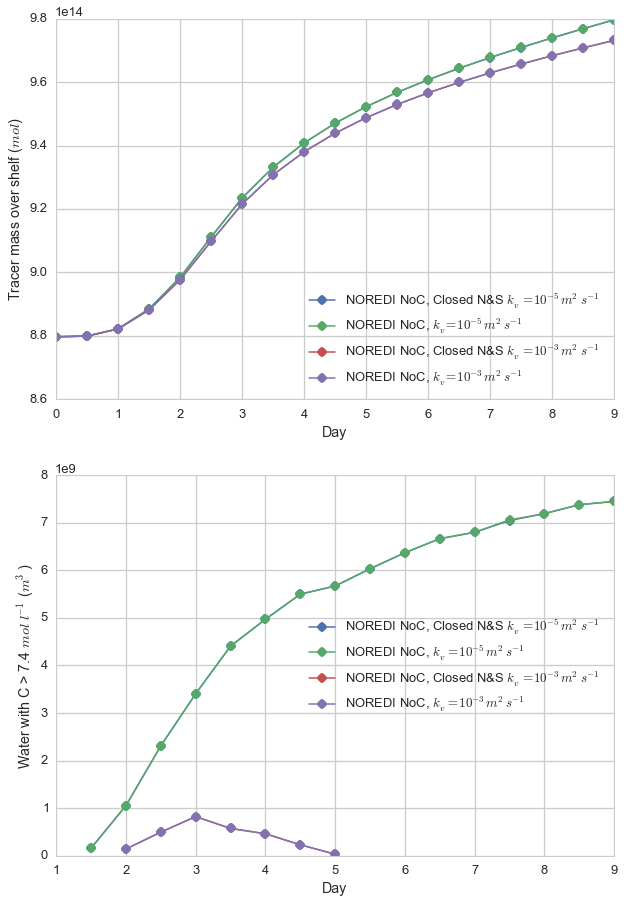

In [46]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR06Tr1,'o-',label='NOREDI NoC, Closed N&S $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR04Tr1,'o-', label='NOREDI NoC, $k_{v}=10^{-5}m^2s^{-1}$')
line1 = ax1.plot(times/2.0, TrMassNOR06Tr3,'o-',label='NOREDI NoC, Closed N&S $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR04Tr3,'o-', label='NOREDI NoC, $k_{v}=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR06Tr1,'o-',label='NOREDI NoC, Closed N&S $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR04Tr1,'o-', label='NOREDI NoC, $k_v=10^{-5}m^2s^{-1}$ ')
line1 = ax2.plot(times/2.0, WatNOR06Tr3,'o-',label='NOREDI NoC, Closed N&S $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR04Tr3,'o-', label='NOREDI NoC, $k_v=10^{-3}m^2s^{-1}$ ')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


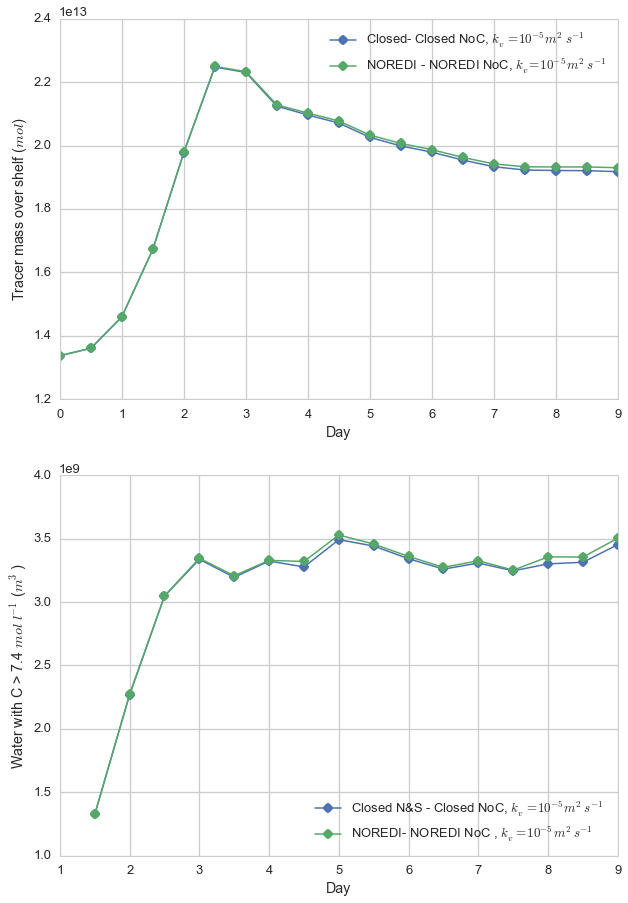

In [47]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR05Tr1-TrMassNOR06Tr1,'o-',label='Closed- Closed NoC, $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR02Tr1-TrMassNOR04Tr1,'o-', label='NOREDI - NOREDI NoC, $k_{v}=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR05Tr1-WatNOR06Tr1,'o-',label='Closed N&S - Closed NoC, $k_v=10^{-5}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR02Tr1-WatNOR04Tr1,'o-', label='NOREDI- NOREDI NoC , $k_v=10^{-5}m^2s^{-1}$ ')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


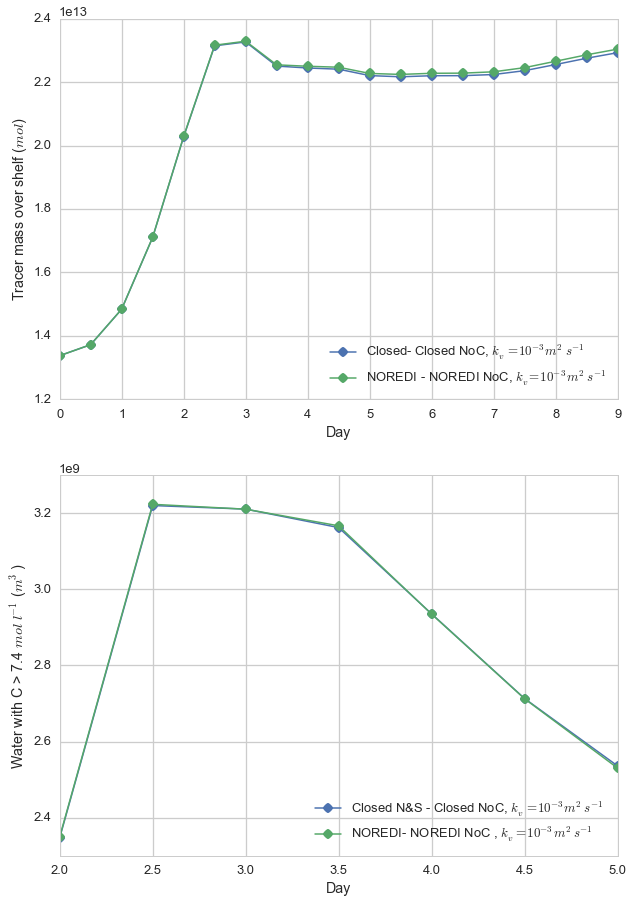

In [48]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR05Tr3-TrMassNOR06Tr3,'o-',label='Closed- Closed NoC, $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TrMassNOR02Tr3-TrMassNOR04Tr3,'o-', label='NOREDI - NOREDI NoC, $k_{v}=10^{-3}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR05Tr3-WatNOR06Tr3,'o-',label='Closed N&S - Closed NoC, $k_v=10^{-3}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, WatNOR02Tr3-WatNOR04Tr3,'o-', label='NOREDI- NOREDI NoC , $k_v=10^{-3}m^2s^{-1}$ ')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#### D) Dynamical effect

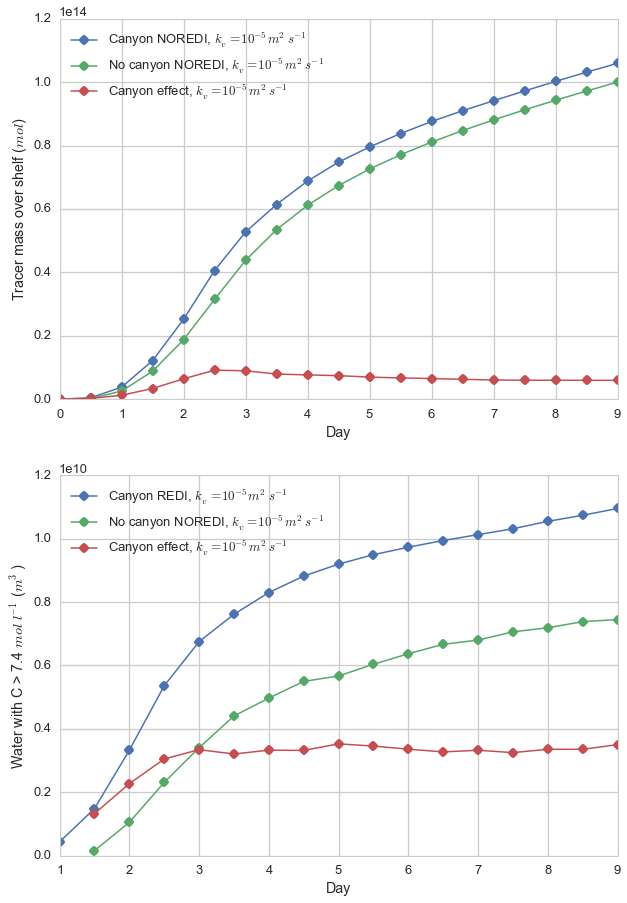

In [52]:
fig45=plt.figure(figsize=(10,15))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TrMassNOR02Tr1- TrMassNOR02Tr1[0],'o-',label='Canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TrMassNOR04Tr1- TrMassNOR04Tr1[0],'o-', label='No canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, (TrMassNOR02Tr1- TrMassNOR02Tr1[0])-(TrMassNOR04Tr1-TrMassNOR04Tr1[0]),'o-', label='Canyon effect, $k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, WatNOR02Tr1,'o-',label='Canyon REDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, WatNOR04Tr1,'o-', label='No canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, WatNOR02Tr1-WatNOR04Tr1,'o-', label='Canyon effect, $k_v=10^{-5}m^2s^{-1}$')

plt.ylabel('Water with C > 7.4 $mol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNoCanyonCasesTr1.eps', format='eps', dpi=1000, bbox_inches='tight')


In [53]:
derMassCanyon = (TrMassNOR02Tr1[1:]-TrMassNOR02Tr1[:-1])/(3600.0*12.0)
derMassNoCCanyon = (TrMassNOR04Tr1[1:]-TrMassNOR04Tr1[:-1])/(3600.0*12.0)
derDiff = derMassCanyon-derMassNoCCanyon


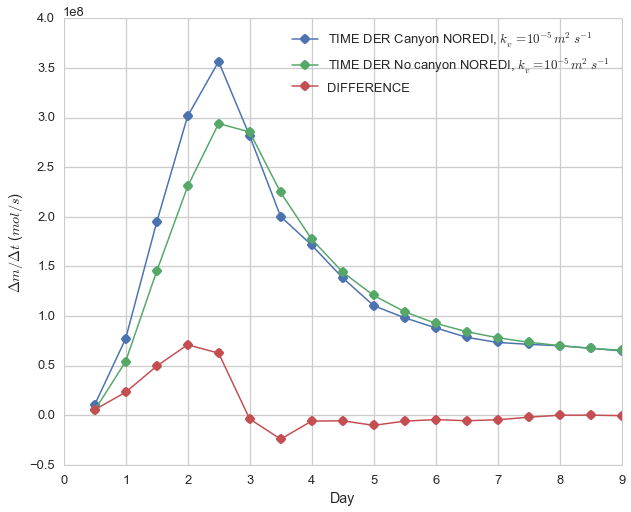

In [54]:
fig45=plt.figure(figsize=(10,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(1,nt,1)

ax1 = plt.subplot(1,1,1)

line1 = ax1.plot(times/2.0, derMassCanyon,'o-',label='TIME DER Canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, derMassNoCCanyon,'o-', label='TIME DER No canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, derDiff,'o-', label='DIFFERENCE')

plt.ylabel('$\Delta m / \Delta t$ ($mol/s$) ')
plt.xlabel('Day')


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfNoCanyonCasesTr1.eps', format='eps', dpi=1000, bbox_inches='tight')


In [55]:
NoC = np.array([4061539.75, 53876724.0, 147540032.0, 236162944.0, 303059744.0, 295337056.0,
                230708400.0, 180173536.0 ,144630160.0, 119786200.0 ,102531200.0, 90422432.0,
                81820096.0, 75630144.0, 71087736.0, 67693840.0, 65079072.0 ,63011000.0])

Canyon = np.array([9479984.0, 77184560.0 ,197686208.0 ,306900480.0, 364642560.0 ,290851296.0,
                   205525984.0, 173459632.0, 138356432.0, 109291600.0 ,96380912.0, 85873552.0,
                   76085392.0 ,70870376.0 ,68918000.0, 67473680.0, 64891548.0, 62190096.0])

Difference = np.array([5418444.5, 23307840.0, 50146172.0, 70737528.0, 61582812.0 ,-4485781.0,
                       -25182422.0 ,-6713906.0 ,-6273719.0, -10494602.0, -6150289.0 ,-4548875.0,
                       -5734703.0, -4759765.5 ,-2169734.5 ,-220164.0625, -187523.4375, -820902.375])

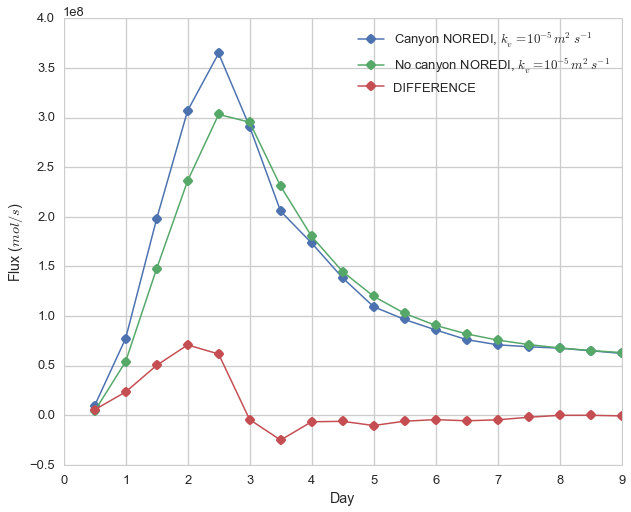

In [56]:
fig45=plt.figure(figsize=(10,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(1,nt,1)

ax1 = plt.subplot(1,1,1)

line1 = ax1.plot(times/2.0, Canyon,'o-',label='Canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, NoC,'o-', label='No canyon NOREDI, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, Difference,'o-', label='DIFFERENCE')

plt.ylabel('Flux ($mol/s$) ')
plt.xlabel('Day')


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,loc=0)

